## Multiple Linear Regression

In [1]:
from torch import nn
import torch
torch.manual_seed(1)

In [2]:
w = torch.tensor([[2.0], [2.0]], requires_grad=True)
b = torch.tensor([1.0],requires_grad=True)

In [3]:
def forward(x):
    yhat = torch.mm(x,w) + b
    return yhat

In [4]:
x = torch.tensor([[1.0, 2.0]])
print(x.shape)
print(w.shape)
yhat = forward(x)
print("The result: ", yhat)

torch.Size([1, 2])
torch.Size([2, 1])
The result:  tensor([[7.]], grad_fn=<AddBackward0>)


In [5]:
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[5.],
        [7.],
        [9.]], grad_fn=<AddBackward0>)


In [6]:
model = nn.Linear(2,1)

In [7]:
yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.3969]], grad_fn=<AddmmBackward>)


In [8]:
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)


In [9]:
class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [12]:
model = linear_regression(2, 1)
print(list(model.parameters()))
print(model.state_dict())

[Parameter containing:
tensor([[-0.0866,  0.1961]], requires_grad=True), Parameter containing:
tensor([0.0349], requires_grad=True)]
OrderedDict([('linear.weight', tensor([[-0.0866,  0.1961]])), ('linear.bias', tensor([0.0349]))])


In [13]:
yhat = model(x)
print(yhat)

tensor([[0.3405]], grad_fn=<AddmmBackward>)


In [14]:
yhat = model(X)
print(yhat)

tensor([[0.1444],
        [0.3405],
        [0.5367]], grad_fn=<AddmmBackward>)


### Training the model

In [15]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [16]:
torch.manual_seed(1)

In [17]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [18]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [19]:
data_set = Data2D()

In [20]:
class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [21]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [23]:
criterion = nn.MSELoss()

In [24]:
train_loader = DataLoader(dataset=data_set, batch_size=2)

Before Training: 


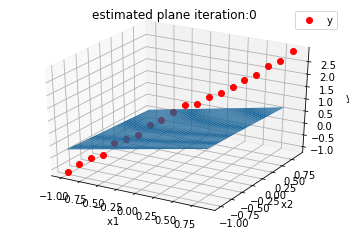

After Training: 


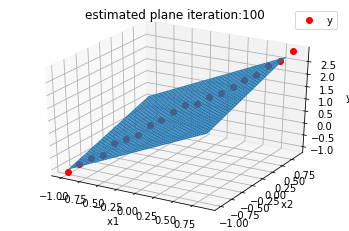

In [25]:
LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Cost/total loss ')

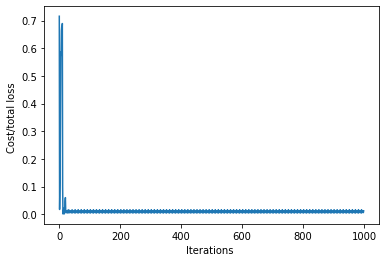

In [26]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")